In [213]:
import os

import tueplots as tue
from tueplots.constants.color import rgb

import pandas as pd
import matplotlib.pyplot as plt

In [214]:
# Set the background color to black
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'

# Set the font color to white
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Set the line color to white
plt.rcParams['lines.color'] = 'white'

# Set the color of the axis spines to white
plt.rcParams['axes.edgecolor'] = 'white'

In [215]:
curr_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(curr_dir, os.pardir))

In [216]:
# load training results

results = {}
top_results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Top-3 Accuracy', 'Top-5 Accuracy'])

mod_dir = os.path.join(root_dir, "mod")

for dataset in os.listdir(mod_dir):
    for file in os.listdir(os.path.join(mod_dir, dataset)):
        if file.endswith('.csv'):
            model = os.path.splitext(file)[0]
            print(f'Processing {model}...')
            history = pd.read_csv(os.path.join(mod_dir, dataset, file))
            results[model + ' ' + dataset] = history
            top_results = pd.concat([top_results, pd.DataFrame({'Model': model,
                                                                'Dataset': dataset,
                                                                'Accuracy': history['val_accuracy'].max(),
                                                                'Top-3 Accuracy': history['val_top_3_accuracy'].max(),
                                                                'Top-5 Accuracy': history['val_top_5_accuracy'].max()}, index=[0])])
top_results

Processing MobileNet...
Processing OwnModel...
Processing OwnModelRegularized...
Processing ResNet50...
Processing VGG16...
Processing OwnModelRegularized...


C:\Users\Steph\AppData\Local\Temp\ipykernel_13640\492495882.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_results = pd.concat([top_results, pd.DataFrame({'Model': model,


,Model,Dataset,Accuracy,Top-3 Accuracy,Top-5 Accuracy
0,MobileNet,first run_gempundit_2022_cropped_augmented_2000,0.453283,0.746328,0.829718
0,OwnModel,first run_gempundit_2022_cropped_augmented_2000,0.505666,0.818385,0.892461
0,OwnModelRegularized,first run_gempundit_2022_cropped_augmented_2000,0.535529,0.837886,0.904374
0,ResNet50,first run_gempundit_2022_cropped_augmented_2000,0.305107,0.579304,0.701216
0,VGG16,first run_gempundit_2022_cropped_augmented_2000,0.502675,0.819698,0.890272
0,OwnModelRegularized,noreg_images_cropped_augmented_2000,0.537730,0.819126,0.891894


# Per Class Distribution Plot

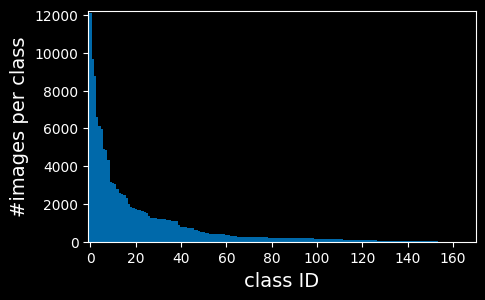

In [217]:
csv_file_src = os.path.join(root_dir, "dat", "gem_count.csv")

df = pd.read_csv(csv_file_src)
df = df.sort_values('count', ascending=False)
df = df.reset_index(drop=True)

# plot

fig, ax = plt.subplots(figsize=(5,3))

ax.bar(
    df.index,
    df['count'],
    width=1.,
    align='center',
    color=rgb.tue_blue
)

ax.set_xlim(min(df.index)-1, max(df.index)+1)
ax.set_ylim(0, max(df['count']) + 100)

ax.set_xlabel("class ID", fontsize=14)
ax.set_ylabel("#images per class", fontsize=14)

plt.savefig("class_distribution.png", bbox_inches='tight')
plt.show()

# Overfitting Plot

For unregularized model

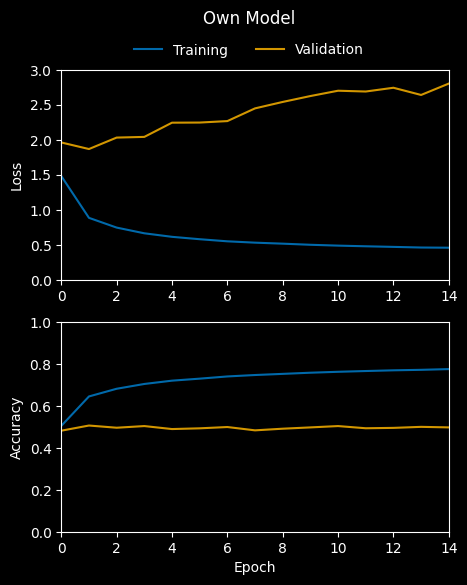

In [218]:
own_model_df = results['OwnModel first run_gempundit_2022_cropped_augmented_2000']

fig, ax = plt.subplots(2, 1, figsize=(5, 6))

ax[0].plot(
    own_model_df['loss'],
    label='Training',
    color=rgb.tue_blue
)
ax[0].plot(
    own_model_df['val_loss'],
    label='Validation', 
    color=rgb.tue_orange
)

ax[0].set_ylim(0, 3)
ax[0].set_xlim(0, 14)
ax[0].set_ylabel("Loss")

ax[1].plot(
    own_model_df['accuracy'],
    label='Training',
    color=rgb.tue_blue
)
ax[1].plot(
    own_model_df['val_accuracy'],
    label='Validation', 
    color=rgb.tue_orange
)

ax[1].set_ylim(0, 1)
ax[1].set_xlim(0, 14)
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")

plt.suptitle("Own Model")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.945), frameon=False)

plt.savefig("overfitting.png", bbox_inches='tight')
plt.show()

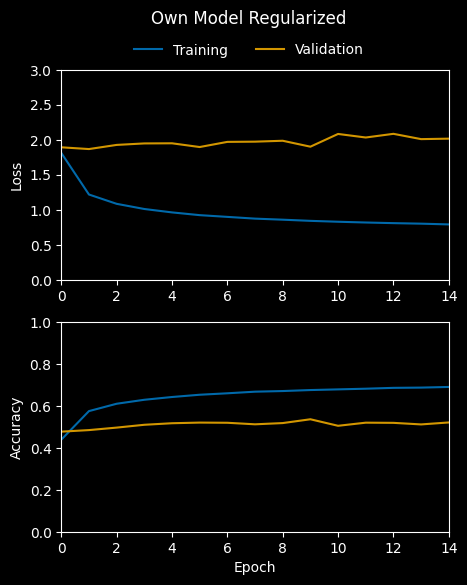

In [219]:
own_model_df = results['OwnModelRegularized first run_gempundit_2022_cropped_augmented_2000']

fig, ax = plt.subplots(2, 1, figsize=(5, 6))

ax[0].plot(
    own_model_df['loss'],
    label='Training',
    color=rgb.tue_blue
)
ax[0].plot(
    own_model_df['val_loss'],
    label='Validation', 
    color=rgb.tue_orange
)

ax[0].set_ylim(0, 3)
ax[0].set_xlim(0, 14)
ax[0].set_ylabel("Loss")

ax[1].plot(
    own_model_df['accuracy'],
    label='Training',
    color=rgb.tue_blue
)
ax[1].plot(
    own_model_df['val_accuracy'],
    label='Validation', 
    color=rgb.tue_orange
)

ax[1].set_ylim(0, 1)
ax[1].set_xlim(0, 14)
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")

plt.suptitle("Own Model Regularized")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.945), frameon=False)

plt.savefig("overfitting_regularized.png", bbox_inches='tight')
plt.show()

# Acc and Loss for all plots

MobileNet first run_gempundit_2022_cropped_augmented_2000


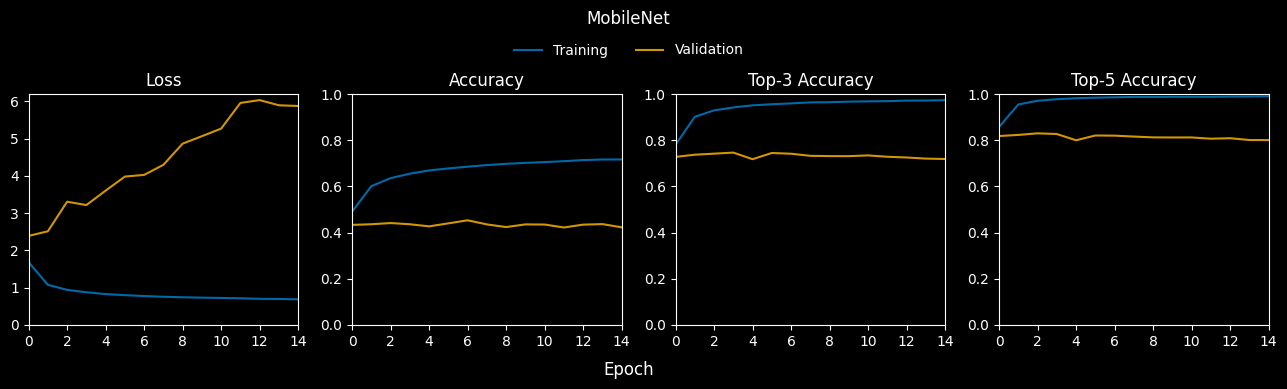

OwnModel first run_gempundit_2022_cropped_augmented_2000


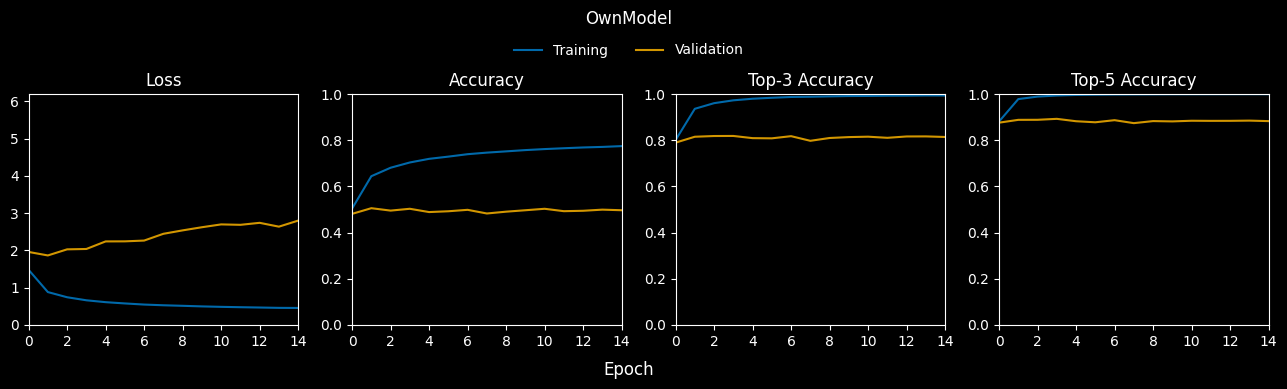

OwnModelRegularized first run_gempundit_2022_cropped_augmented_2000


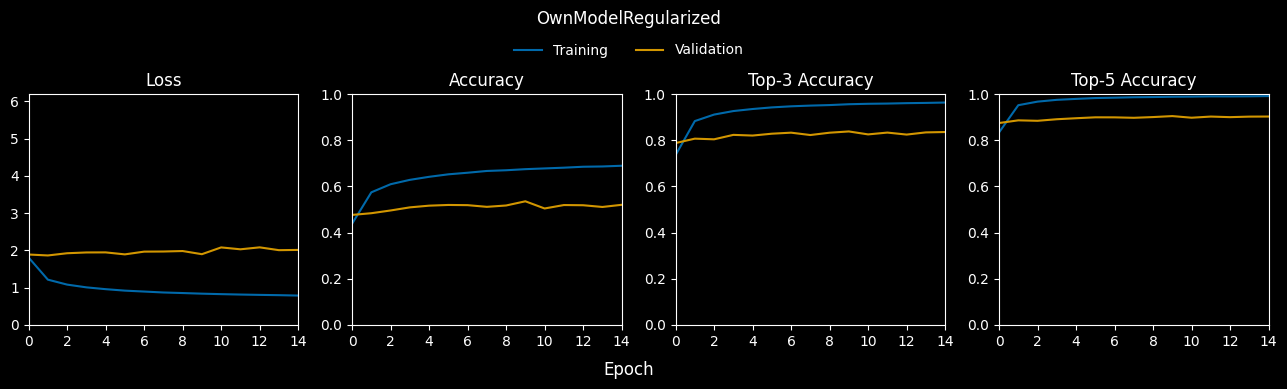

ResNet50 first run_gempundit_2022_cropped_augmented_2000


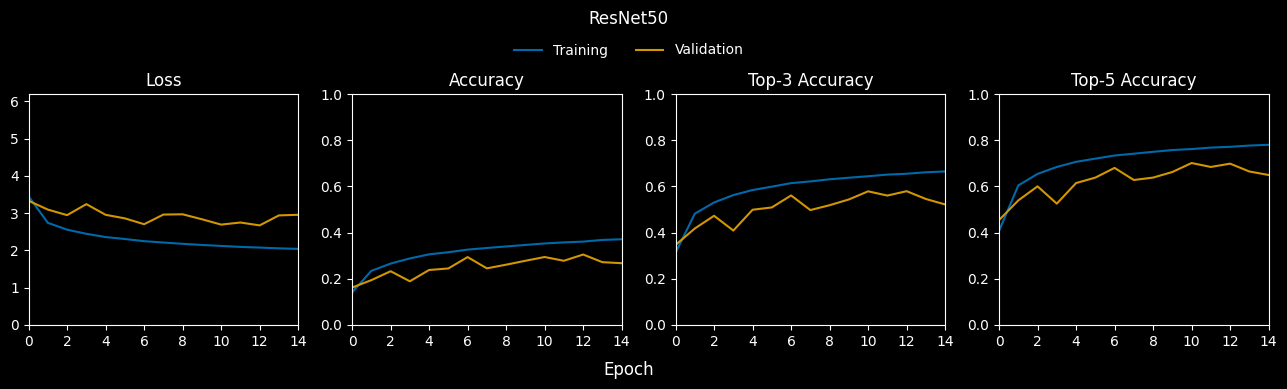

VGG16 first run_gempundit_2022_cropped_augmented_2000


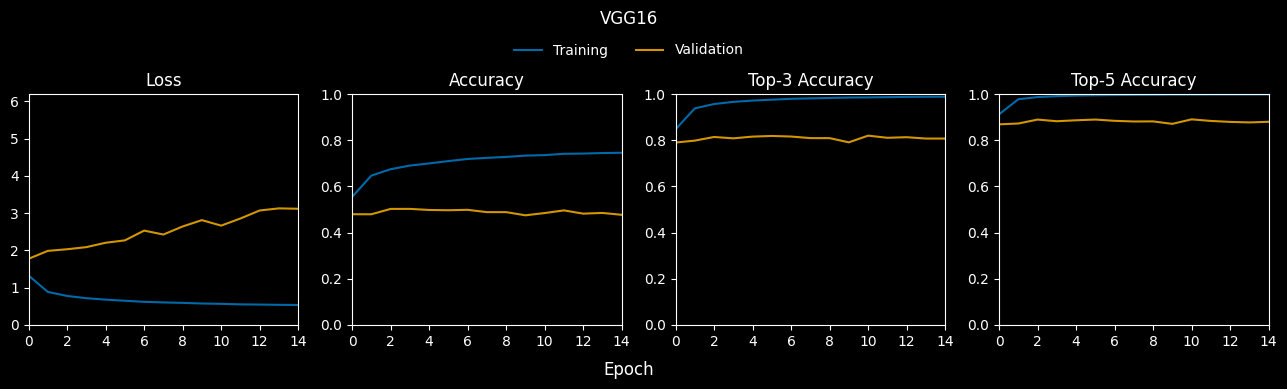

In [220]:
def plot_loss_acc(history, model):
    print(model)
    fig, ax = plt.subplots(1, 4, sharex=True, figsize=(16, 3))

    ax[0].plot(history['loss'], label='Training', color=rgb.tue_blue)
    ax[0].plot(history['val_loss'], label='Validation', color=rgb.tue_orange)
    ax[0].set_xlim([0, len(history['loss'])-1])
    ax[0].set_ylim([0, 6.2])
    ax[0].set_xticks(range(0, 15, 2))
    ax[0].set_title('Loss')
    
    ax[1].plot(history['accuracy'], label='Training', color=rgb.tue_blue)
    ax[1].plot(history['val_accuracy'], label='Validation', color=rgb.tue_orange)
    ax[1].set_xlim([0, len(history['accuracy'])-1])
    ax[1].set_ylim([0, 1])
    ax[1].set_xticks(range(0, 15, 2))
    ax[1].set_title('Accuracy')
    
    ax[2].plot(history['top_3_accuracy'], label='Training', color=rgb.tue_blue)
    ax[2].plot(history['val_top_3_accuracy'], label='Validation', color=rgb.tue_orange)
    ax[2].set_xlim([0, len(history['accuracy'])-1])
    ax[2].set_ylim([0, 1])
    ax[2].set_xticks(range(0, 15, 2))
    ax[2].set_title('Top-3 Accuracy')

    ax[3].plot(history['top_5_accuracy'], label='Training', color=rgb.tue_blue)
    ax[3].plot(history['val_top_5_accuracy'], label='Validation', color=rgb.tue_orange)
    ax[3].set_xlim([0, len(history['accuracy'])-1])
    ax[3].set_ylim([0, 1])
    ax[3].set_xticks(range(0, 15, 2))
    ax[3].set_title('Top-5 Accuracy')


    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.09), ncol=2, frameon=False)

    plt.suptitle(model.split()[0], y=1.16)
    fig.supxlabel("Epoch", y=-0.07)
    plt.savefig("loss_acc_{}.png".format(model.split()[0]), bbox_inches='tight')
    plt.show()

for i, (model, history) in enumerate(results.items()):
    if i < 5:
        plot_loss_acc(history, model)

# Last Epoch Accurracy Comparison

skip OwnModel first run_gempundit_2022_cropped_augmented_2000
skip OwnModelRegularized noreg_images_cropped_augmented_2000
{'MobileNet': {'epoch15': 0.4228355884552002, 'max_val': 0.4532830715179443, 'max_ep': 6}, 'OwnModelRegularized': {'epoch15': 0.520315945148468, 'max_val': 0.5355285406112671, 'max_ep': 9}, 'ResNet50': {'epoch15': 0.2675340473651886, 'max_val': 0.3051069974899292, 'max_ep': 12}, 'VGG16': {'epoch15': 0.4770184755325317, 'max_val': 0.5026751160621643, 'max_ep': 3}}
skip OwnModel first run_gempundit_2022_cropped_augmented_2000
skip OwnModelRegularized noreg_images_cropped_augmented_2000
{'MobileNet': {'epoch15': 0.7186040878295898, 'max_val': 0.746327817440033, 'max_ep': 3}, 'OwnModelRegularized': {'epoch15': 0.8353827595710754, 'max_val': 0.8378857970237732, 'max_ep': 9}, 'ResNet50': {'epoch15': 0.5218385457992554, 'max_val': 0.5793044567108154, 'max_ep': 12}, 'VGG16': {'epoch15': 0.8071255087852478, 'max_val': 0.8196984529495239, 'max_ep': 10}}
skip OwnModel first r

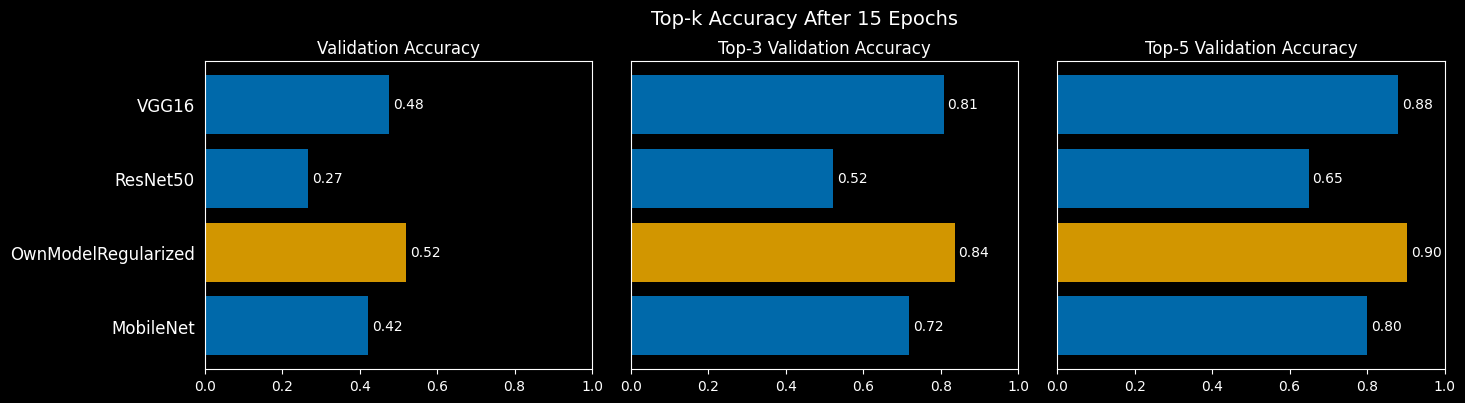

In [221]:
accuracy_level = ["val_accuracy", "val_top_3_accuracy", "val_top_5_accuracy"]
accuracy_label = ["Validation Accuracy", "Top-3 Validation Accuracy", "Top-5 Validation Accuracy"]

epoch15 = True

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 4))

for i, acc_lvl in enumerate(accuracy_level):
    top_acc = {}
    for model, history in results.items():
        stats = {}
        if model != "OwnModel first run_gempundit_2022_cropped_augmented_2000" and model != "OwnModelRegularized noreg_images_cropped_augmented_2000":
            stats['epoch15'] = history.loc[14, acc_lvl]
            stats['max_val'] = max(history[acc_lvl])
            stats['max_ep'] = history[acc_lvl].idxmax()
            top_acc[model.split()[0]] = stats
        else:
            print("skip " + model)
    print(top_acc)
    
    models = []
    values = []
    epochs = []
    for m in top_acc.keys():
        models.append(m)
        if epoch15:
            values.append(top_acc[m]['epoch15'])
        else:
            values.append(top_acc[m]['max_val'])
        epochs.append(top_acc[m]['max_ep'])

    colors = []
    for m in models:
        if m == "OwnModelRegularized":
            colors.append(rgb.tue_orange)
        else: 
            colors.append(rgb.tue_blue)
    
    bars = ax[i].barh(
        range(len(models)),
        values,
        color=colors
    )

    # Add value labels to the bars
    for bar, value, epoch in zip(bars, values, epochs):
        ax[i].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.2f}', 
                   va='center', ha='left', fontsize=10, color='white')
        if epoch15 is False:
            ax[i].text(0.01, bar.get_y() + bar.get_height()/2, f'Epoch: {epoch}', 
                   va='center', ha='left', fontsize=10, color='white')
    
    ax[i].set_title(accuracy_label[i])
    ax[i].set_xlim([0, 1])
    if i > 0:
        ax[i].set_yticklabels([])
    else:
        ax[0].set_yticks(range(len(models)), models, fontsize=12)
    ax[i].yaxis.set_ticks_position('none')

if epoch15:
    plt.suptitle("Top-k Accuracy After 15 Epochs", y=1.01, fontsize=14)
plt.subplots_adjust(wspace=0.1)
plt.savefig("accuracy_comparison.png", bbox_inches='tight')
plt.show()

    
    

In [222]:
results.keys()

dict_keys(['MobileNet first run_gempundit_2022_cropped_augmented_2000', 'OwnModel first run_gempundit_2022_cropped_augmented_2000', 'OwnModelRegularized first run_gempundit_2022_cropped_augmented_2000', 'ResNet50 first run_gempundit_2022_cropped_augmented_2000', 'VGG16 first run_gempundit_2022_cropped_augmented_2000', 'OwnModelRegularized noreg_images_cropped_augmented_2000'])

# Compare Top-k Accuracy Own Model

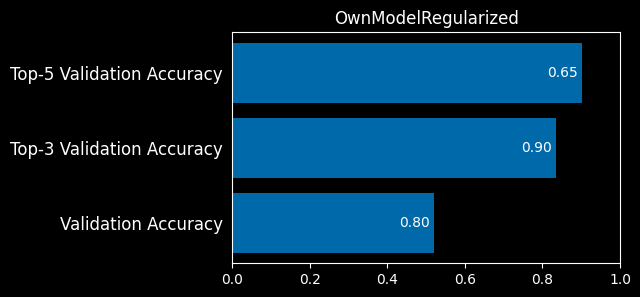

In [223]:
accuracy_level = ["val_accuracy", "val_top_3_accuracy", "val_top_5_accuracy"]
accuracy_label = ["Validation Accuracy", "Top-3 Validation Accuracy", "Top-5 Validation Accuracy"]

fig, ax = plt.subplots(figsize=(5, 3))

acc_lvl_stats = []

data = results["OwnModelRegularized first run_gempundit_2022_cropped_augmented_2000"]
for i, acc_lvl in enumerate(accuracy_level):
    acc_lvl_stats.append(data.loc[14, acc_lvl])

bars = ax.barh(
    range(len(acc_lvl_stats)),
    acc_lvl_stats,
    color=rgb.tue_blue
)

# Add value labels to the bars
for bar, value, epoch in zip(bars, values, epochs):
    ax.text(bar.get_width() - 0.01, bar.get_y() + bar.get_height()/2, f'{value:.2f}', va='center', ha='right', fontsize=10, color='white')

    
ax.set_xlim([0, 1])
ax.set_yticks(range(len(accuracy_label)), accuracy_label, fontsize=12)
ax.yaxis.set_ticks_position('none')
plt.subplots_adjust(wspace=0.1)
plt.title("OwnModelRegularized")
plt.savefig("own_model_accuracy.png", bbox_inches='tight')
plt.show()

    
    